### Objectives:
* Practice and implement feedforward, multi-layer networks and apply them to the CIFAR-10 dataset
* Prepare image data for deep learning 
* Learn to use neural network basics (convex functions, loss functions, Gradient descent, Activation functions, Geometric representation)

### Total Points Possible: 50

##Part I: Introduction 
###1. Import the necessary packages from tensorflow for the following tasks.
* Build a Sequential model
* Use Dense hidden layers
* Use Stochastic Gradient Descent(SDG) optimizer
* Uuild classification report
* Import **cifar10** dataset
 * from tensorflow.keras.datasets import cifar10 

###2. Explore the details about datasets such as cifat10, cifar100
* https://www.tensorflow.org/datasets/catalog/cifar10
* https://keras.io/api/datasets/cifar10/

###3. Understanding Data
* Based on the exploration of datasets in Part I.2, there are 10 types of images in the dataset {"airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"} identified by the corresponding index numbers.
* Load the cifar10 dataset into X_train, Y_train, X_test, and Y_test variables
* Explore the shapes and sizes of the images
* The images contain rgb components and are 3-dimensional.
* Print a sample image data, it's dimenstions
* Print the distinct labels of images in the dataset
* Display the first 9 images in a neat format (use subplots) and the corresponding labels at the top of each image


## Part 2: Preprocessing
* Convert the pixel data into binary range (0 to 1)
* Now, convert the 3D image to a vector
* Also, apply one-hot encoding to convert the labels into vectors of length 10 using **LabelBinarizer** 

  * Note: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html


## Part 3: Define the model 
* Reading: 
 * https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
  * https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
* Write a function ${build\_model()}$ to define the architecture of the model using Keras using the following information:
 * The model is sequential.
 * $Hidden Layer 1$ contains 1024 Dense neurons, the activation function is $'relu'$ 
 * $Hidden Layer 2$ contains 512 Dense neurons with the same activation function as hidden Layer 1
 * $Output Layer$ is Dense with $'softmax'$ activation function.


## Part 4:Train the model (compile and fit)
* Reading:
 * https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
 * https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/
* Train the model:
 * We use SGD optimizer to train the network with a learning rate set to 0.01, which is the intial choice, and display accuracy of the model.
 * Use 200 epoches of batch size = 32
 * The loss function can be of your choice.
* Save your model for future :
 * Use model.save() to create a SavedModel folder `my_model`. SavedModel is the more comprehensive save format that saves the model architecture, weights, and the traced Tensorflow subgraphs of the call functions. It enables Keras to restore both built-in layers as well as custom objects. 

## part 5: Evaluate the model
* Once the model is trained, let us evaluate it on the testing data and obtain the final classification results including precision, recall, and f-1 score.
* Plot the loss and accuracy values of training and testing your model.
* Document your findings from the results.

## ** Your Code Follows **.
* Include as many function defintions as you can and simply call the functions appropriately. It helps make your program precise.
* For each of the five parts that you code, make your code functional and record your observation using appropriate comment lines such as multiline comments (''' Your comment ''').
* It is important to comment all parts of your code based on code.
Note: A list of useful reads befor you begin documentation:
 * https://www.python.org/dev/peps/pep-0008/
 * https://www.zenesys.com/blog/coding-standards-and-best-practices-for-python-code-quality
* You can initially write your code im multiple cells and execute them sequentially. 
* Once the code works, put them all in one cell at the end of all your code and execute it as a single program with appropriate print statements to print all the outputs on one page.

### Importing necessary libraries


In [1]:
# PART I
# 1.
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.keras.models import Sequential, Model, load_model, save_model
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.layers import Dense, Activation, Dropout
# from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape

from tensorflow.python.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [3]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.8.0


### Importing the cifar10 dataset

In [4]:
# Importing the cifar10 dataset

from tensorflow.keras.datasets import cifar10

In [5]:
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [7]:
# PART 1.2
# Data shape

print("Data shape: \nx_train: {}\ny_train: {}\nx_test: {}\ny_test: {}"
        .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Data shape: 
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [8]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
print("Data shape: \nx_train: {}\ny_train: {}\nx_test: {}\ny_test: {}"
        .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Data shape: 
x_train: (50000, 32, 32, 3)
y_train: (50000,)
x_test: (10000, 32, 32, 3)
y_test: (10000,)


In [10]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


### Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

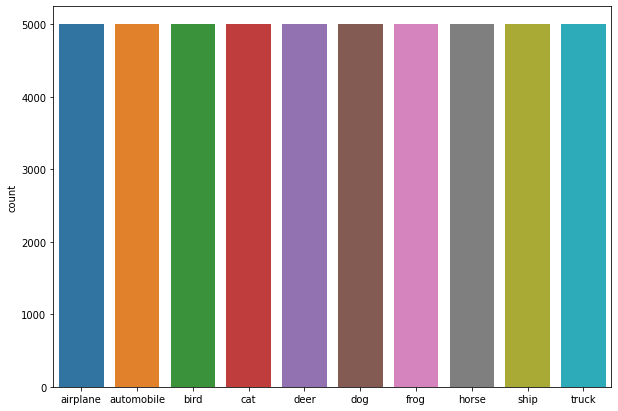

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train)
p.set(xticklabels=classes)

In [12]:
# Finding null values if present

np.isnan(x_train).any()

False

In [13]:
np.isnan(x_test).any()

False

In [14]:
img = x_train[0]
label = y_train[0]

In [15]:
img

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
label

6

In [17]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

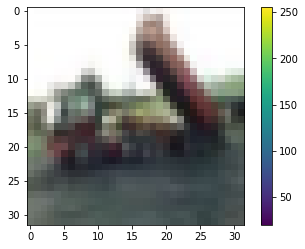

In [18]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)

plt.show()

### Sample images from dataset

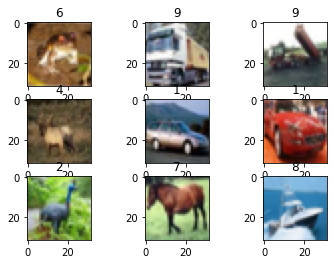

In [19]:
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(x_train[i])
  plt.title(y_train[i])
plt.show()

### Reshape and Normalization

In [20]:
# Normalization

input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [21]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [22]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

### Converting to tensors

In [23]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

### One hot encoding using LabelBinarizer

In [24]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [25]:
y_train.shape

(50000, 10)

In [26]:
y_test.shape

(10000, 10)

In [27]:
x_train.shape

TensorShape([50000, 32, 32, 3])

In [28]:
x_test.shape

TensorShape([10000, 32, 32, 3])

In [29]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [30]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

[0 0 0 0 1 0 0 0 0 0]


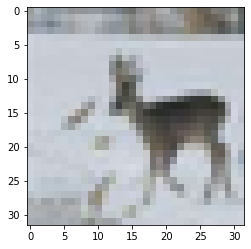

In [31]:
plt.imshow(x_train[20])
print(y_train[20])

In [32]:
print("Data shape: \nx_train: {}\ny_train: {}\nx_test: {}\ny_test: {}"
        .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Data shape: 
x_train: (50000, 32, 32, 3)
y_train: (50000, 10)
x_test: (10000, 32, 32, 3)
y_test: (10000, 10)


In [33]:
x_train[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882

In [44]:
batch_size = 32
num_classes = 10
epochs = 10

# def build_model():

#   model = keras.Sequential([
#       layers.Dense(1024, activation="relu", name = "HiddenLayer1"),
#       layers.Dense(512, activation="relu", name = "HiddenLayer2"),
#       layers.Dense(10, activation="softmax", name = "OutputLayer")
#   ])

#   return model

### Creating model using keras

Epochs - 10 for time purposes. For some reason my laptop was crashing after 14-15 epochs despite using Google Colab. Stochastic Gradient Descent optimizer.

In [45]:
# model = build_model()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu", name = "HiddenLayer1"),
    tf.keras.layers.Dense(512, activation="relu", name = "HiddenLayer2"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

# model = tf.keras.models.Sequential([
#       tf.keras.layers.Dense(1024, activation="relu", name = "HiddenLayer1"),
#       tf.keras.layers.Dense(512, activation="relu", name = "HiddenLayer2"),
#       tf.keras.layers.Dense(10, activation="softmax", name = "OutputLayer")
#   ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [46]:
model

In [47]:
opt = SGD(lr = 0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Fitting model to data

In [48]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
1563/1563 [==============================] - 334s 214ms/step - loss: 2.0776 - accuracy: 0.2260
Epoch 2/10
1563/1563 [==============================] - 277s 177ms/step - loss: 1.7240 - accuracy: 0.3686
Epoch 3/10
1563/1563 [==============================] - 280s 179ms/step - loss: 1.5372 - accuracy: 0.4393
Epoch 4/10
1563/1563 [==============================] - 281s 180ms/step - loss: 1.4093 - accuracy: 0.4901
Epoch 5/10
1563/1563 [==============================] - 277s 177ms/step - loss: 1.3217 - accuracy: 0.5271
Epoch 6/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.2492 - accuracy: 0.5539
Epoch 7/10
1563/1563 [==============================] - 276s 177ms/step - loss: 1.1861 - accuracy: 0.5790
Epoch 8/10
1563/1563 [==============================] - 277s 177ms/step - loss: 1.1192 - accuracy: 0.6049
Epoch 9/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.0685 - accuracy: 0.6205
Epoch 10/10
1563/1563 [=======================

### Plotting loss and accuracy

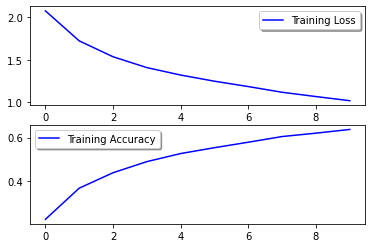

In [50]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 14s 45ms/step - loss: 0.9440 - accuracy: 0.6632


### Confusion matrix

In [52]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

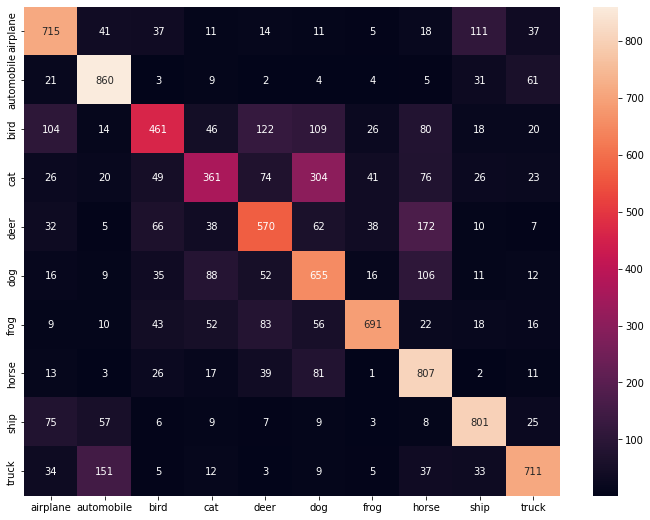

In [53]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

##END